# Programming Exercise 4: Neural Networks Learning
# 1 Neural Networks
## 1.1 Visualizing the data

In [1]:
import scipy.io

data = scipy.io.loadmat('../matlab/ex4data1.mat')
print data.keys()

['y', 'X', '__version__', '__header__', '__globals__']


In [2]:
X = data['X']
y = data['y']
print X.shape
print y.shape

(5000, 400)
(5000, 1)


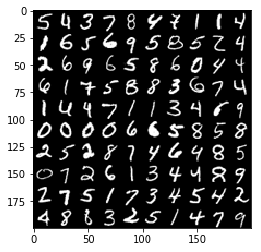

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
% matplotlib inline

im = Image.new('I', (200, 200))
np.random.seed(1234)
for i, rowid in enumerate(np.random.randint(0, 5000, 100)):
    im.paste(Image.fromarray(X[rowid, :].reshape((20, 20)).T * 256), ((i / 10) * 20, (i % 10) * 20))
plt.imshow(im)

## 1.2 Model representation
![title](../../ex3/python/fig2.png)
## 1.3 Feedforward and cost function
$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} [ -y_k^{(i)} \log (h_\theta(x^{(i)})_k) - (1 - y_k^{(i)}) \log (1 - h_\theta(x^{(i)})_k) ]$

In [4]:
def sigmoid(z):
    ### YOUR CODE HERE ###


    ######################

def add_ones(X):
    m, _ = X.shape
    return np.column_stack((np.ones((m, 1)), X))

def cost(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_):
    lambda_ = float(lambda_)
    m, _ = X.shape
    Theta1_len = hidden_layer_size * (input_layer_size + 1)
    Theta1 = nn_params[:Theta1_len].reshape((hidden_layer_size, input_layer_size + 1))
    Theta2 = nn_params[Theta1_len:].reshape((num_labels, hidden_layer_size + 1))
    ### YOUR CODE HERE ###


    
    
    ######################
    return J

In [5]:
data = scipy.io.loadmat('../matlab/ex4weights.mat')
print data.keys()

['Theta2', '__version__', '__header__', 'Theta1', '__globals__']


In [6]:
Theta1 = data['Theta1']
Theta2 = data['Theta2']
print Theta1.shape
print Theta2.shape

nn_params = np.concatenate((Theta1.flatten(), Theta2.flatten()))
input_layer_size  = 400;  # 20x20 Input Images of Digits
hidden_layer_size = 25;   # 25 hidden units
num_labels = 10;          # 10 labels, from 1 to 10

J = cost(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, 0.0)
print J  # should be about 0.287629

(25, 401)
(10, 26)
0.287629165161


## 1.4 Regularized cost function
$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} [ -y_k^{(i)} \log (h_\theta(x^{(i)})_k) - (1 - y_k^{(i)}) \log (1 - h_\theta(x^{(i)})_k) ] + \frac{\lambda}{2m} [\sum_{j=1}^{25} \sum_{k=1}^{400} (\Theta_{j,k}^{(1)})^2 + \sum_{j=1}^{10} \sum_{k=1}^{25} (\Theta_{j,k}^{(2)})^2]$

In [7]:
lambda_ = 1.0
J = cost(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_)
print J  # should be about 0.383770

0.383769859091


# 2 Backpropagation
## 2.1 Sigmoid gradient

In [8]:
def sigmoid_gradient(z):
    ### YOUR CODE HERE ###


    ######################

print sigmoid_gradient(0)
print sigmoid_gradient(np.array([-1, 0, 1]))

0.25
[ 0.19661193  0.25        0.19661193]


## 2.2 Random initialization

In [9]:
def rand_initialize_weights(L_in, L_out, epsilon_init=0.12):
    W = np.random.rand(L_in, L_out) * 2 * epsilon_init - epsilon_init
    return W

np.random.seed(1234)
print rand_initialize_weights(2, 3)

[[-0.07403533  0.02930611 -0.01494534]
 [ 0.06848606  0.06719419 -0.05457777]]


## 2.3 Backpropagation (iterative implementation)
![title](fig3.png)
- Input layer: 20 * 20 + 1 = 401 nodes
- Hidden layer: 25 + 1 = 26 nodes
- Output layer: 10 nodes
- Parameters
  - $\Theta^{(1)}$: shape = (25, 401)
  - $\Theta^{(2)}$: shape = (10, 26)
  - $y_j$, $a_j^{(3)}$, $\delta_j^{(3)}$ ($j=1,\ldots,m$): shape = (10,) (in iterative implementation)
  - $y$, $a^{(3)}$, $\delta^{(3)}$: shape = ($m$, 10) (in vector implementation)

In [10]:
def iterative_gradient(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_):
    lambda_ = float(lambda_)
    m, _ = X.shape
    Theta1_len = hidden_layer_size * (input_layer_size + 1)
    Theta1 = nn_params[:Theta1_len].reshape((hidden_layer_size, input_layer_size + 1))
    Theta2 = nn_params[Theta1_len:].reshape((num_labels, hidden_layer_size + 1))
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)
    X = add_ones(X)
    y = y[:, 0]
    for t in range(m):
    ### YOUR CODE HERE ###
        a1 = ???
        assert a1.shape == (input_layer_size + 1,)
        z2 = ???
        assert z2.shape == (hidden_layer_size,)
        a2 = ???
        assert a2.shape == (hidden_layer_size + 1,)
        z3 = ???
        assert z3.shape == (num_labels,)
        a3 = ???
        assert a3.shape == (num_labels,)
        y_ = np.array([y[t] == i for i in range(1, num_labels + 1)])
        assert y_.shape == (num_labels,)
        delta3 = ???
        assert delta3.shape == (num_labels,)
        delta2 = ???
        assert delta2.shape == (hidden_layer_size,)
        Theta2_grad += np.outer(delta3, a2)
        Theta1_grad += np.outer(delta2, a1)

    assert Theta1_grad.shape == Theta1.shape
    assert Theta2_grad.shape == Theta2.shape
    Theta1_grad /= m
    Theta2_grad /= m


    ######################
    return np.append(Theta1_grad.flatten(), Theta2_grad.flatten())

In [11]:
import time
start_time = time.clock()
iter_grad = iterative_gradient(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_)
print '%.2f sec' % (time.clock() - start_time)
print iter_grad

1.75 sec
[  6.18712766e-05  -2.11248326e-12   4.38829369e-13 ...,   4.70513145e-05
  -5.01718610e-04   5.07825789e-04]


## 2.4 Gradient checking

In [12]:
def slow_gradient(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_,
                  epsilon=1e-4):
    def cost_(theta):
        return cost(theta, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_)

    n = len(nn_params)
    grad = np.zeros(n)
    for i in xrange(n):
        delta = np.zeros(n)
        delta[i] = epsilon
        grad[i] = 0.5 / epsilon * (cost_(nn_params + delta) - cost_(nn_params - delta))
    return grad

start_time = time.clock()
correct_grad = slow_gradient(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_)
print '%.2f sec' % (time.clock() - start_time)

1398.73 sec


Note that this was run on a very old computer (Late 2010 MacBook Air with 1.86 GHz Intel Core 2 Duo).

expected:
[  6.18712781e-05  -1.94289029e-12   5.55111512e-13   2.76861867e-09
  -3.52215479e-08   9.36370426e-08   1.05523840e-06  -5.98485428e-07
  -9.63077951e-07  -2.66227596e-07   2.30113428e-07   9.16391962e-08
  -2.02817485e-07  -4.46210013e-07  -1.56185620e-07  -1.88008775e-07
  -4.98448505e-08  -5.50051671e-08  -4.39731584e-09   8.49875725e-10]
actual:
[  6.18712766e-05  -2.11248326e-12   4.38829369e-13   2.76892220e-09
  -3.52212999e-08   9.36371460e-08   1.05523848e-06  -5.98485168e-07
  -9.63077942e-07  -2.66227564e-07   2.30113649e-07   9.16392907e-08
  -2.02817390e-07  -4.46210085e-07  -1.56186177e-07  -1.88008938e-07
  -4.98453184e-08  -5.50051327e-08  -4.39741503e-09   8.49866781e-10]
max error = 1.069223e-11


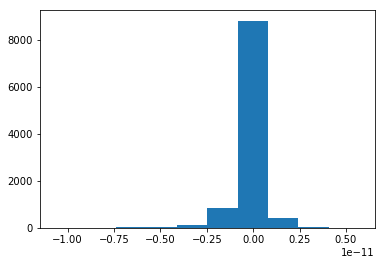

In [15]:
plt.hist(iter_grad - correct_grad)
print 'expected:\n', correct_grad[:20]
print 'actual:\n', iter_grad[:20]
print 'max error = %e' % max(abs(iter_grad - correct_grad))

## 2.3 Backpropagation (vectorized implementation)

In [16]:
def vector_gradient(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_):
    lambda_ = float(lambda_)
    m, _ = X.shape
    Theta1_len = hidden_layer_size * (input_layer_size + 1)
    Theta1 = nn_params[:Theta1_len].reshape((hidden_layer_size, input_layer_size + 1))
    Theta2 = nn_params[Theta1_len:].reshape((num_labels, hidden_layer_size + 1))
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)
    ### YOUR CODE HERE ###
    a1 = ???
    assert a1.shape == (m, input_layer_size + 1)
    z2 = ???
    a2 = ???
    assert a2.shape == (m, hidden_layer_size + 1)
    a3 = ???
    assert a3.shape == (m, num_labels)
    y_ = np.column_stack([y == i for i in range(1, num_labels + 1)])
    assert y_.shape == (m, num_labels)
    delta3 = ???
    delta2 = ???
    assert delta2.shape == (m, hidden_layer_size)
    Theta2_grad += ???
    assert Theta2_grad.shape == Theta2.shape
    Theta1_grad += ???
    assert Theta1_grad.shape == Theta1.shape
    Theta1_grad /= m
    Theta2_grad /= m


    ######################
    return np.append(Theta1_grad.flatten(), Theta2_grad.flatten())

0.14 sec
expected:
[  6.18712781e-05  -1.94289029e-12   5.55111512e-13   2.76861867e-09
  -3.52215479e-08   9.36370426e-08   1.05523840e-06  -5.98485428e-07
  -9.63077951e-07  -2.66227596e-07   2.30113428e-07   9.16391962e-08
  -2.02817485e-07  -4.46210013e-07  -1.56185620e-07  -1.88008775e-07
  -4.98448505e-08  -5.50051671e-08  -4.39731584e-09   8.49875725e-10]
actual:
[  6.18712766e-05  -2.11248326e-12   4.38829369e-13   2.76892220e-09
  -3.52212999e-08   9.36371460e-08   1.05523848e-06  -5.98485168e-07
  -9.63077942e-07  -2.66227564e-07   2.30113649e-07   9.16392907e-08
  -2.02817390e-07  -4.46210085e-07  -1.56186177e-07  -1.88008938e-07
  -4.98453184e-08  -5.50051327e-08  -4.39741503e-09   8.49866781e-10]
max error = 1.069224e-11
max difference between iterative and vectorized implementations = 4.542807e-17


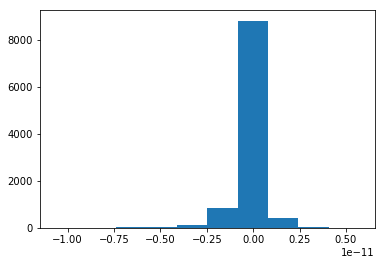

In [18]:
start_time = time.clock()
vec_grad = vector_gradient(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_)
print '%.2f sec' % (time.clock() - start_time)
print 'expected:\n', correct_grad[:20]
print 'actual:\n', vec_grad[:20]
plt.hist(vec_grad - correct_grad)
print 'max error = %e' % max(abs(vec_grad - correct_grad))
print 'max difference between iterative and vectorized implementations = %e' % max(abs(iter_grad - vec_grad))

## 2.6 Learning parameters using fmincg

In [19]:
from scipy.optimize import fmin_cg

cost_ = lambda t: cost(t, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_)
gradient_ = lambda t: vector_gradient(t, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_)

initial_Theta1 = rand_initialize_weights(hidden_layer_size, input_layer_size + 1)
initial_Theta2 = rand_initialize_weights(num_labels, hidden_layer_size + 1)
initial_theta = np.append(initial_Theta1.flatten(), initial_Theta2.flatten())
theta = fmin_cg(cost_, initial_theta, fprime=gradient_, maxiter=400)

         Current function value: 0.317954
         Iterations: 400
         Function evaluations: 951
         Gradient evaluations: 951


In [20]:
Theta1_len = hidden_layer_size * (input_layer_size + 1)
Theta1 = theta[:Theta1_len].reshape((hidden_layer_size, input_layer_size + 1))
Theta2 = theta[Theta1_len:].reshape((num_labels, hidden_layer_size + 1))

In [21]:
def predict(Theta1, Theta2, X):  # cf. ex3_nn
    '''Returns an array of predicted digits (1..10)'''
    ### YOUR CODE HERE ###
    
    
    
    
    ######################

In [22]:
predictions = predict(Theta1, Theta2, X)
print 'training set accuracy = %.1f%%' % (
    100.0 * sum(p == y_ for p, y_ in zip(predictions, y.flatten())) / len(predictions))

training set accuracy = 99.5%


# 3 Visualizing the hidden layer

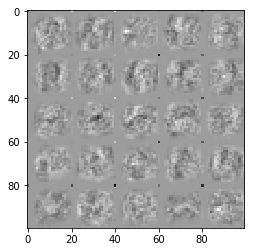

In [23]:
im = Image.new('I', (100, 100))
max_ = Theta1.max()
min_ = Theta1.min()
for i in range(25):
    im.paste(Image.fromarray((Theta1[i, :400].reshape((20, 20)) - min_) / (max_ - min_) * 256),
             ((i / 5) * 20, (i % 5) * 20))
plt.imshow(im)